# (Presentation Title)
## by (your name here)

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#create list of collumns to keep for analysis
cols_to_keep = ['ListingKey', 'BorrowerAPR', 'Term', 'IncomeRange', 'EmploymentStatus',
                'LoanOriginalAmount', 'DebtToIncomeRatio', 'ListingCategory (numeric)', 
                'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'AmountDelinquent']

#assign queried collumns as df_trimmed variable
df_trimmed = df[cols_to_keep]

In [4]:
#remove ' (numeric)' string from `ListingCategory`
df_trimmed = df_trimmed.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"})

In [5]:
#create list of columns with nulls
nulls_todrop = ['EmploymentStatus', 'DebtToIncomeRatio',
                'DelinquenciesLast7Years', 'AmountDelinquent']

#drop row observations where there are nulls in each specified column
for col in nulls_todrop:
    df_trimmed = df_trimmed[df_trimmed[col].notnull()]

In [6]:
#create dictionary of desired orders for each category
cat_dict = {'Term' : [12, 36, 60],
            'IncomeRange' : ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999',
                             '$50,000-74,999', '$75,000-99,999', '$100,000+']}

#loop over two dictionary variables and apply each ordered list to categorical Dtype
for col in cat_dict:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = cat_dict[col])
    df_trimmed[col] = df_trimmed[col].astype(order)

In [7]:
#change bool data to string for categorical analysis
df_trimmed['IsBorrowerHomeowner'] = df_trimmed['IsBorrowerHomeowner'].astype('str')

In [8]:
#change `ListingCategory` from integer to category string
#first change dtype to string for iteration
df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].astype('str')

#assign dictionary of category name to number
cat_dict = {'0' : 'Not Available',
            '1' : 'Debt Consolidation',
            '2' : 'Home Improvement', 
            '3' : 'Business',
            '4' : 'Personal Loan',
            '5' : 'Student Use',
            '6' : 'Auto', 
            '7' : 'Other',
            '8' : 'Baby&Adoption',
            '9' : 'Boat',
            '10' : 'Cosmetic Procedure',
            '11' : 'Engagement Ring',
            '12' : 'Green Loans',
            '13' : 'Household Expenses', 
            '14' : 'Large Purchases',
            '15' : 'Medical/Dental',
            '16' : 'Motorcycle',
            '17' : 'RV',
            '18' : 'Taxes',
            '19' : 'Vacation',
            '20' : 'Wedding Loans'}

#loop over column and replace numbers with category strings
for num, string in cat_dict.items():
    df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].replace(num, string)

In [9]:
#replace zeroes with NaN values in the three specified columns
del_cols = ['AmountDelinquent', 'DelinquenciesLast7Years']
df_trimmed[del_cols] = df_trimmed[del_cols].replace({0 : np.nan})

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

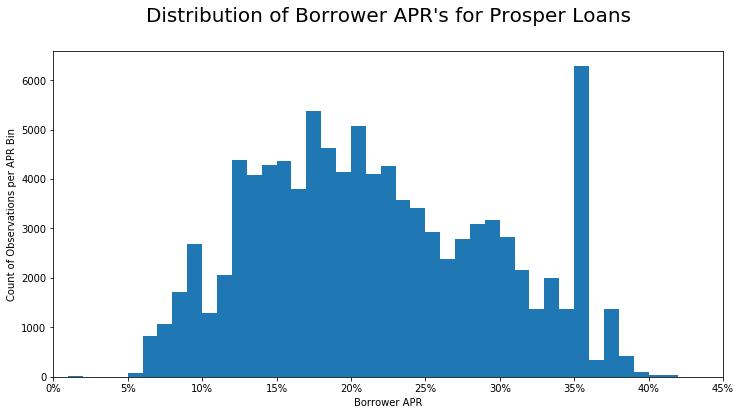

In [63]:
#Creates an array of bins at a specified binsize for histogram
binsize = 0.01 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)
ticks = np.arange(0, df_trimmed['BorrowerAPR'].max() + 0.05, 0.05)
tick_names = ['{}%'.format(int(i*100)) for i in ticks]

#plots a histogram of `BorrowerAPR`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'BorrowerAPR', bins = bins)
plt.xlim([0, 0.45])
plt.xticks(ticks, tick_names)
plt.title("Distribution of Borrower APR's for Prosper Loans",
          fontsize=20, y=1.07)
plt.xlabel('Borrower APR')
plt.ylabel('Count of Observations per APR Bin');

In [11]:
#assign quantitative and qualitative variables to separate lists for easy coding
cat_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'ListingCategory', 'IsBorrowerHomeowner']
quant_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio',
              'DelinquenciesLast7Years', 'AmountDelinquent']

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

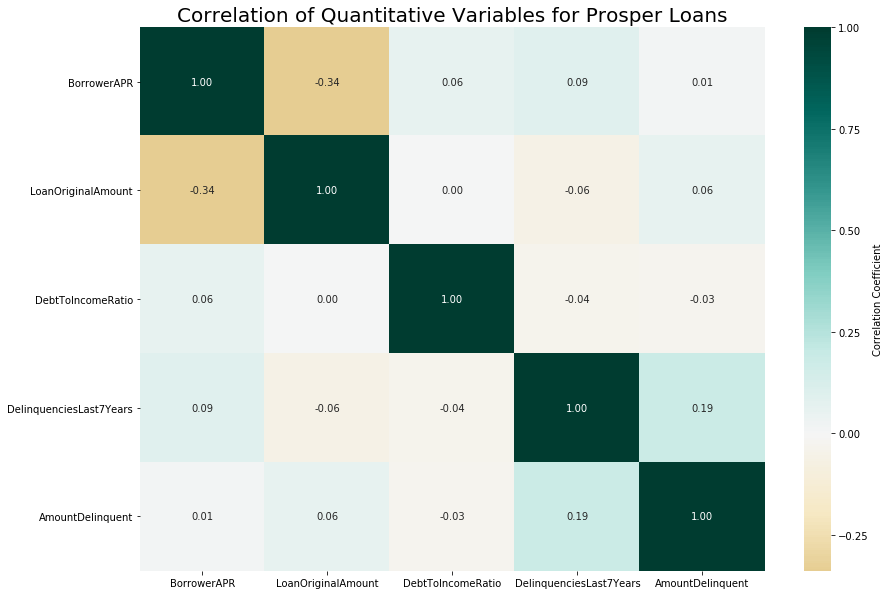

In [60]:
#displays heatmap of five quantitative variables for more accurate view of correlation coefficients
plt.figure(figsize = [14, 10])
sns.heatmap(df_trimmed[quant_vars].corr(), annot = True, fmt = '.2f',
            cmap = 'BrBG', center = 0, cbar_kws = {'label' : 'Correlation Coefficient'})
plt.title('Correlation of Quantitative Variables for Prosper Loans',
          fontsize=20);

## (Visualization 3)



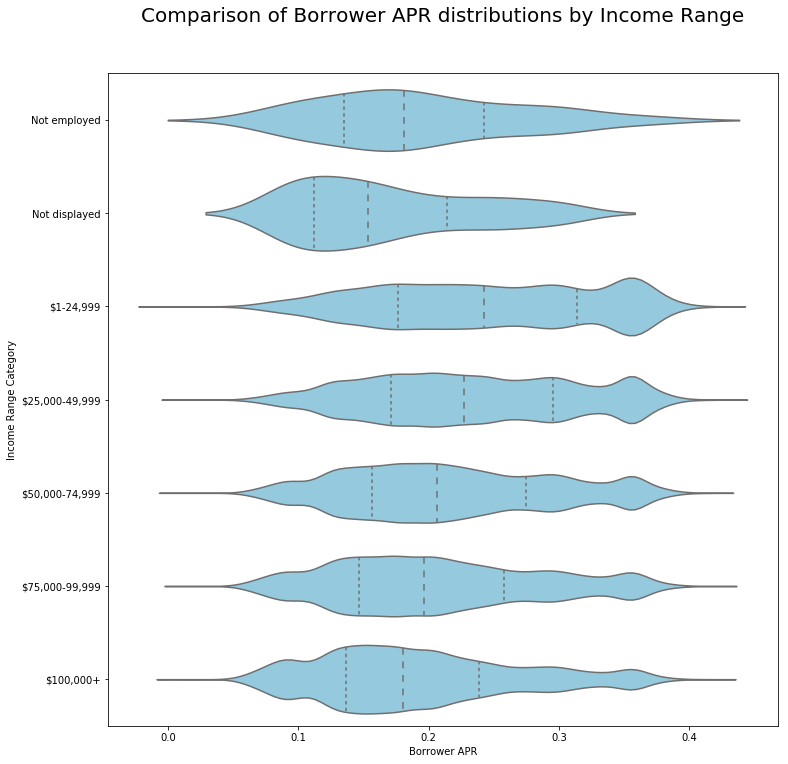

In [54]:
#Displays violinplots of BorrowerAPR by ListingCategory
plt.figure(figsize = (12,12))
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'IncomeRange',
               color = 'skyblue', inner = 'quartile')
plt.title('Comparison of Borrower APR distributions by Income Range',
          fontsize=20, y=1.07)
plt.ylabel('Income Range Category')
plt.xlabel('Borrower APR');

## (Visualization 3)



In [14]:
#create two separate dataframe variables queried by other and 36 month Term derations
other_durations = df_trimmed.query("Term == 12 or Term == 60")
three_years = df_trimmed.query("Term == 36")


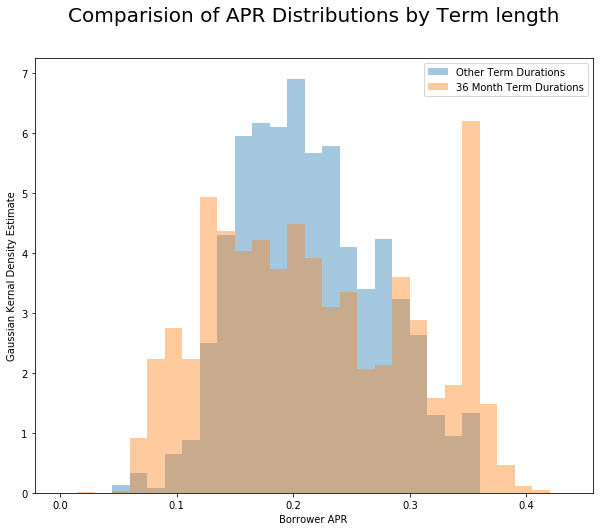

In [45]:
#set bin size and edges for histograms
binsize = 0.015 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)

#plot overlapping histograms of the BorrowerAPR base on queried categories
plt.figure(figsize=(10, 8))
sns.distplot(other_durations['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = 'Other Term Durations')
sns.distplot(three_years['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = '36 Month Term Durations')

#format title, legend, axes and text
plt.title('Comparision of APR Distributions by Term length', fontsize=20, y =1.07)
plt.ylabel('Gaussian Kernal Density Estimate')
plt.xlabel('Borrower APR')
plt.legend()
plt.show();

In [16]:
#create a index object variable of `ListingCategory` values
List_cats = df_trimmed['ListingCategory'].value_counts().index

#remove 'Debt Consolidation' from index object
List_cats = List_cats.drop('Debt Consolidation')

#loop over `ListingCategory` column and replace values with other
for string in List_cats:
    df_trimmed['ListingCategory'].replace({string : 'other'}, inplace =True)

In [17]:
def catmodes(cat_var_l, cat_var_2):
    '''
    Takes two categorical variable inputs that are column variables of df_trimmed.  
    The BorrowerAPR collumn values are then grouped by the two inputed categorical
    variables by mode.
    '''
    #assigns mode APR of grouped variables to cat_modes
    mode = lambda x:x.value_counts().index[0]
    cat_modes = df_trimmed.groupby([cat_var_l, cat_var_2])['BorrowerAPR'].agg(mode)
    cat_modes = cat_modes.reset_index(name = 'mode')
    cat_modes = cat_modes.pivot(index = cat_var_l, columns = cat_var_2, values = 'mode')
    return cat_modes

def catmeans(cat_var_l, cat_var_2):
    '''
    Takes two categorical variable inputs that are column variables of df_trimmed.  
    The BorrowerAPR collumn values are then grouped by the two inputed categorical
    variables by mean.
    '''
    #assigns mean APR of grouped variables to cat_means
    cat_means = df_trimmed.groupby([cat_var_l, cat_var_2]).mean()['BorrowerAPR']
    cat_means = cat_means.reset_index(name = 'mean')
    cat_means = cat_means.pivot(index = cat_var_l, columns = cat_var_2, values = 'mean')
    return cat_means

## (Visualization 3)



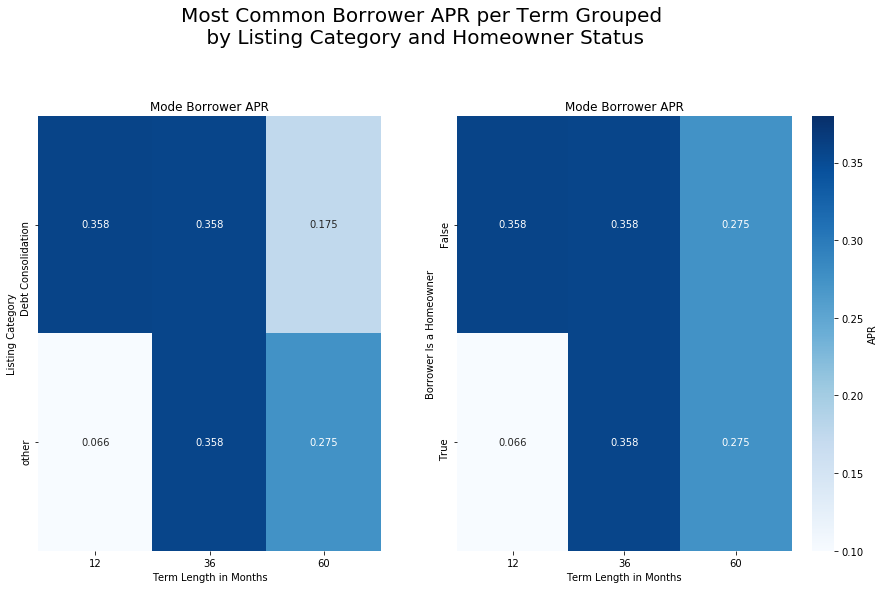

In [43]:
#creates two sublotted heat maps side by side via the variables ax1 and ax2
fig, ax = plt.subplots(ncols=2, figsize=(15,8), gridspec_kw={'width_ratios': [1, 1.22]})
ax1 = sns.heatmap(catmodes('ListingCategory', 'Term'),
                    annot = True, fmt = '.3f',
                    cbar = False,
                    cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[0])
ax2 = sns.heatmap(catmodes('IsBorrowerHomeowner', 'Term'),
                    annot = True, fmt = '.3f',
                    cbar_kws = {'label' : 'APR'},
                    cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[1])

#tweeks the format and text of the subplots and figure
plt.subplots_adjust(wspace = 0.2)
ax1.title.set_text('Mode Borrower APR')
ax1.set_ylabel('Listing Category')
ax1.set_xlabel('Term Length in Months')
ax2.title.set_text('Mode Borrower APR')
ax2.set_ylabel('Borrower Is a Homeowner')
ax2.set_xlabel('Term Length in Months')
fig.suptitle('Most Common Borrower APR per Term Grouped\n by Listing Category and Homeowner Status',
             fontsize=20, x=0.48, y =1.07);

## (Visualization 3)



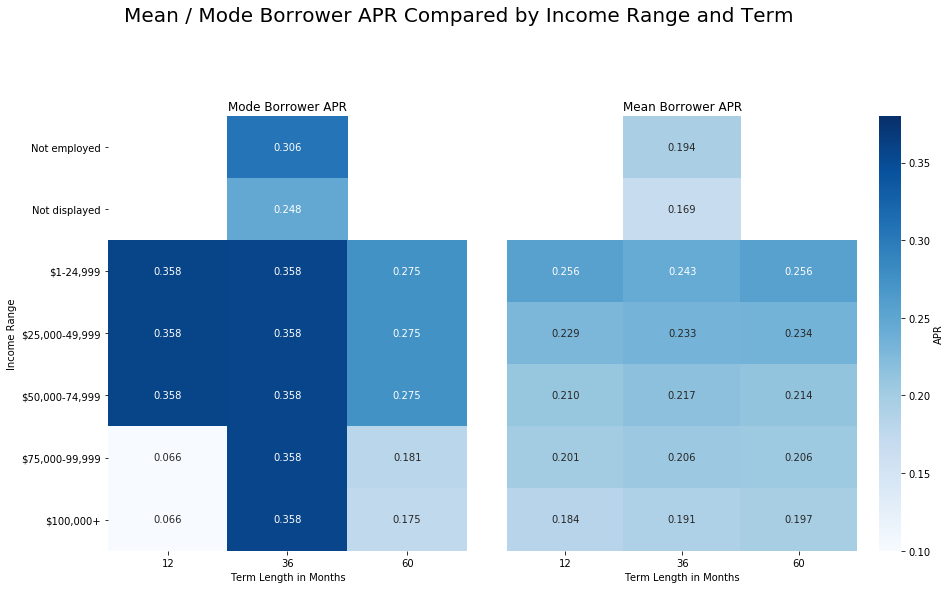

In [36]:
#creates two sublotted heat maps side by side via the variables ax1 and ax2
fig, ax = plt.subplots(ncols=2, figsize=(15,8), gridspec_kw={'width_ratios': [1, 1.22]})
ax1 = sns.heatmap(catmodes('IncomeRange', 'Term'),
                  annot = True, fmt = '.3f',
                  cbar = False,
                  cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[0])
ax2 = sns.heatmap(catmeans('IncomeRange', 'Term'),
                  annot = True, fmt = '.3f',
                  cbar_kws = {'label' : 'APR'},
                  cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[1])

#tweeks the format and text of the subplots and figure
plt.subplots_adjust(wspace = 0.1)
ax1.title.set_text('Mode Borrower APR')
ax1.set_ylabel('Income Range')
ax1.set_xlabel('Term Length in Months')
ax2.title.set_text('Mean Borrower APR')
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.set_xlabel('Term Length in Months')
fig.suptitle('Mean / Mode Borrower APR Compared by Income Range and Term', fontsize=20, x=0.45, y =1.07);


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!